In [2]:
import pandas as pd
import numpy as np

# 1.Importing Excel File

In [3]:
df = pd.read_excel(r"C:\Users\aryan\Downloads\final data_with_politeness_1000.xlsx")

In [4]:
df  

,Domain,dialogue_id,Source Link,user,bot,Politeness Level Evaluation
0,Credit Card,1,NaN,Hi! I have some doubts regarding credit and de...,Sure! Let me know your query.,4.0
1,Credit Card,1,NaN,What's the best way to use a credit card? Shou...,Yes! you should always pay off your credit ca...,5.0
2,Credit Card,1,NaN,"Now tell me, when should I use a debit card in...","Well as per my understanding, you can use your...",3.0
3,Credit Card,1,NaN,Is it better to use a cashback or rewards cred...,"Yes, if you can pay off the balance each month...",4.0
4,Credit Card,1,NaN,"Okay, thanks for the advice!",You're most welcome.,5.0
...,...,...,...,...,...,...
2522,BANKING,999,NaN,How do I know if my account is insured?,"Most banks offer deposit insurance, so it’s al...",3.0
2523,BANKING,999,NaN,What should I do if I pass the FDIC insured li...,"Unless you're saving for something specific, l...",4.0
2524,BANKING,999,NaN,Many online banks outright lie about being FDI...,"Hello! Yes, that's correct—SIPC (Securities In...",4.0
2525,BANKING,1000,NaN,What’s the purpose of a bank SWIFT code?,Hello! A SWIFT code is an international identi...,4.0


# 2. Data Cleaning

In [5]:
unique_counts = df['Domain'].value_counts()

# Display the unique elements and their counts
print(unique_counts)

Domain
stocks               825
Banking              282
investment           220
Investment           186
personal finance     158
Loan                 154
General Finance      134
Personal Finance      81
Credit Card           71
 personal finance     54
Personal finance      49
Tax                   48
trading               32
Insurance             30
BANKING               26
banking               25
Debit Card            20
tax                   17
credit card           16
stock                 14
Mortgage              13
Trading               11
general finance        9
Stock                  9
Credit card            8
Charges Related        8
Cryptocurrency         7
Lien                   6
mortgage               3
Personal finance       3
cryptocurrency         3
general Finance        2
Insurance              1
Stocks                 1
Debit card             1
Name: count, dtype: int64


In [6]:
unique_counts = df['Domain'].str.strip().str.lower().value_counts()

print(pd.DataFrame({'Lowercase': unique_counts.index, 'Count': unique_counts.values}))


           Lowercase  Count
0             stocks    826
1         investment    406
2   personal finance    345
3            banking    333
4               loan    154
5    general finance    145
6        credit card     95
7                tax     65
8            trading     43
9          insurance     31
10             stock     23
11        debit card     21
12          mortgage     16
13    cryptocurrency     10
14   charges related      8
15              lien      6


In [7]:
# Remove leading/trailing spaces and convert to lowercase
df['Domain'] = df['Domain'].str.strip().str.lower()

# Define a custom mapping to merge similar elements (e.g., 'stock' and 'stocks' as 'stock')
mapping = {
    'stocks': 'stock',
    # Add more mappings if needed
}

# Apply the mapping
df['Domain'] = df['Domain'].replace(mapping)

# Get the count of each unique element
unique_counts = df['Domain'].value_counts()

# Display the results
print(pd.DataFrame({'Lowercase': unique_counts.index, 'Count': unique_counts.values}))

           Lowercase  Count
0              stock    849
1         investment    406
2   personal finance    345
3            banking    333
4               loan    154
5    general finance    145
6        credit card     95
7                tax     65
8            trading     43
9          insurance     31
10        debit card     21
11          mortgage     16
12    cryptocurrency     10
13   charges related      8
14              lien      6


# 3. Average Politeness Score

In [8]:
df.groupby(by='Domain')['Politeness Level Evaluation'].mean()

Domain
banking             4.528529
charges related     3.875000
credit card         4.242105
cryptocurrency      4.500000
debit card          4.857143
general finance     4.575862
insurance           4.225806
investment          4.246305
lien                3.833333
loan                3.915584
mortgage            4.625000
personal finance    4.395652
stock               4.331368
tax                 4.307692
trading             4.372093
Name: Politeness Level Evaluation, dtype: float64

# Total Entries (Count): 2,526
  Mean (Average) Politeness Score: 4.34 → Generally high politeness.
  Standard Deviation: 0.67 → Moderate variation in scores.
  Minimum Score: 3.00 → Lowest politeness level observed.
  25th Percentile : 4.00 → 25% of queries have a politeness score of 4 or lower.
  Median (50th Percentile): 4.00 → Half of the queries score 4 or lower.
  75th Percentile : 5.00 → 75% of queries have a politeness score of 5 or lower.
  Maximum Score: 5.00 → Highest politeness level.

  Politeness levels vary significantly between finance domains. This suggests that certain domains (e.g., Insurance, Debit Cards) have consistently higher politeness, while others (e.g., Lien, Loans) tend to be less polite.


# GRAPHS

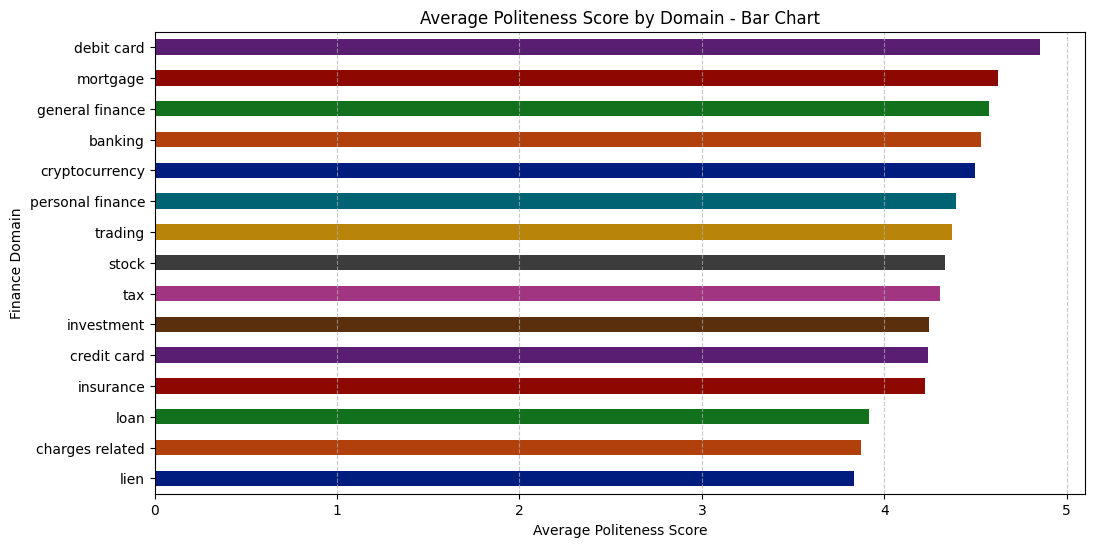

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns  

# Calculate the average politeness score per domain
avg_politeness_per_domain = df.groupby("Domain")["Politeness Level Evaluation"].mean().sort_values(ascending=False)

# Generate unique dark colors using seaborn's "dark" palette
dark_colors = sns.color_palette("dark", len(avg_politeness_per_domain))  

# Bar Chart with Dark Shades
plt.figure(figsize=(12, 6))
avg_politeness_per_domain.sort_values(ascending=True).plot(kind='barh', color=dark_colors)
plt.title("Average Politeness Score by Domain - Bar Chart")
plt.xlabel("Average Politeness Score")
plt.ylabel("Finance Domain")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Distribution and Variability of Politeness scores.

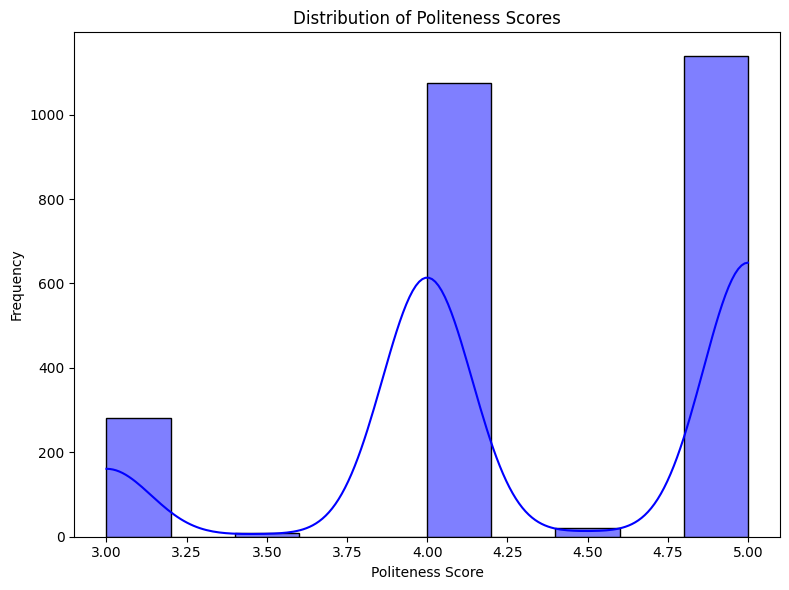

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for politeness scores
plt.figure(figsize=(8, 6))
sns.histplot(df["Politeness Level Evaluation"], bins=10, kde=True, color="blue")
plt.title("Distribution of Politeness Scores")
plt.xlabel("Politeness Score")
plt.ylabel("Frequency")

# Show the plot
plt.tight_layout()
plt.show()


# 4. Words per Query for each Domain

In [11]:
def word_count(text):
    return len(str(text).split())

# Apply word count function to bot responses
df["Bot_Word_Count"] = df["bot"].apply(word_count)

# Calculate average words per bot response for each domain
avg_words_per_domain = df.groupby("Domain")["Bot_Word_Count"].mean().sort_values(ascending=False)

# Display results
print(avg_words_per_domain)

Domain
trading             152.093023
lien                 57.833333
charges related      56.250000
tax                  55.769231
credit card          44.305263
cryptocurrency       41.700000
investment           40.906404
personal finance     36.663768
loan                 34.201299
stock                33.957597
debit card           32.476190
banking              29.315315
general finance      28.744828
mortgage             27.187500
insurance            26.193548
Name: Bot_Word_Count, dtype: float64


# GRAPHS 

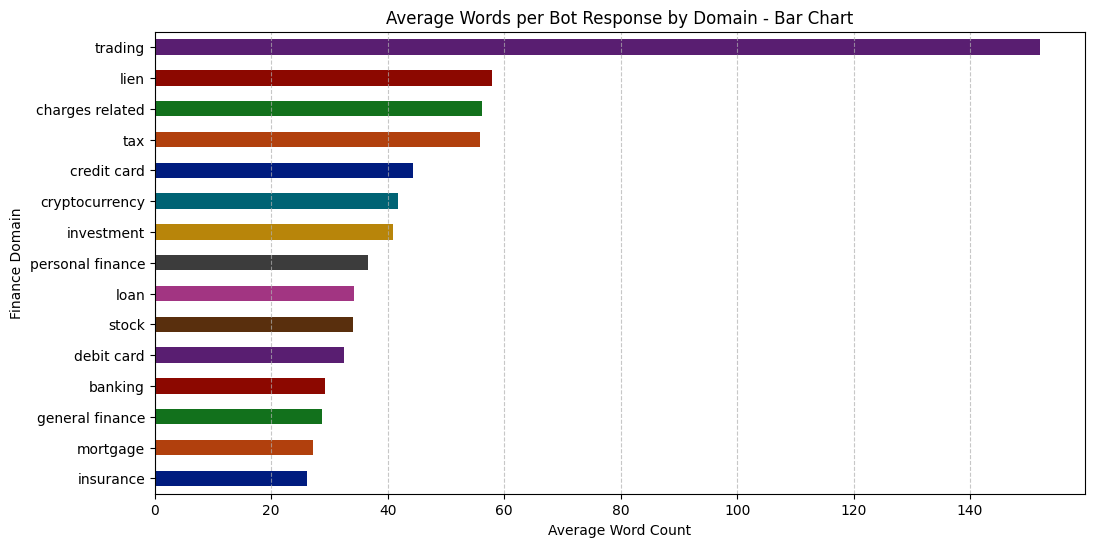

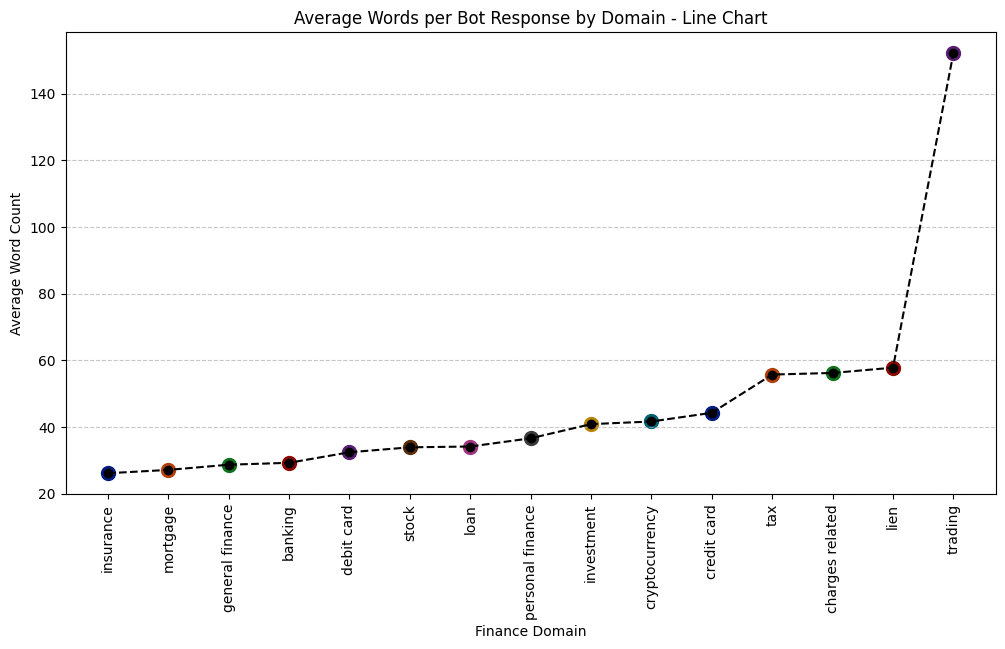

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns  

# Generate deeper colors using seaborn's "dark" palette
deep_colors = sns.color_palette("dark", len(avg_words_per_domain))  # Darker serious tones

# Bar Chart with Deeper Colors
plt.figure(figsize=(12, 6))
avg_words_per_domain.sort_values(ascending=True).plot(kind='barh', color=deep_colors)
plt.title("Average Words per Bot Response by Domain - Bar Chart")
plt.xlabel("Average Word Count")
plt.ylabel("Finance Domain")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Line Chart with Deeper Colors
plt.figure(figsize=(12, 6))
sorted_domains = avg_words_per_domain.sort_values(ascending=True)
plt.plot(sorted_domains.index, sorted_domains.values, marker='o', linestyle='dashed', color='black')  # Line in black

# Scatter points with deep colors
for i, domain in enumerate(sorted_domains.index):
    plt.scatter(domain, sorted_domains.values[i], color=deep_colors[i], s=100, label=domain)

# Ensure all x-axis labels are displayed
plt.xticks(ticks=range(len(sorted_domains.index)), labels=sorted_domains.index, rotation=90)

# Chart labels & grid
plt.title("Average Words per Bot Response by Domain - Line Chart")
plt.xlabel("Finance Domain")
plt.ylabel("Average Word Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Vocabulary Size

In [13]:
import re
from collections import Counter

# Function to tokenize and extract unique words
def get_vocabulary(text_series):
    words = []
    for text in text_series.dropna():  # Remove NaN values
        words.extend(re.findall(r'\b\w+\b', text.lower()))  # Tokenize words & convert to lowercase
    return set(words)  # Return unique words as a set

# Vocabulary size for user queries
user_vocab = get_vocabulary(df["user"])
print(f"User Vocabulary Size: {len(user_vocab)}")

# Vocabulary size for bot responses
bot_vocab = get_vocabulary(df["bot"])
print(f"Bot Vocabulary Size: {len(bot_vocab)}")

# Combined vocabulary size
total_vocab = user_vocab.union(bot_vocab)
print(f"Total Vocabulary Size: {len(total_vocab)}")


User Vocabulary Size: 2797
Bot Vocabulary Size: 5766
Total Vocabulary Size: 6129


# Avg no.of tokens per user

In [14]:
# Function to count words (tokens) in a text
def count_tokens(text):
    return len(str(text).split())

# Apply word count function to user queries
df["User_Token_Count"] = df["user"].apply(count_tokens)

# Calculate the average number of tokens per user query
avg_tokens_per_user = df["User_Token_Count"].mean()

print(f"Average Number of Tokens per User Query: {avg_tokens_per_user:.2f}")


Average Number of Tokens per User Query: 11.73


In [15]:
# Avg no. of Sentences per user

In [16]:
import re

# Function to count sentences in a text
def count_sentences(text):
    return len(re.split(r'[.!?]+', str(text).strip())) - 1  # Split on sentence-ending punctuation

# Apply sentence count function to user queries
df["User_Sentence_Count"] = df["user"].apply(count_sentences)

# Calculate the average number of sentences per user query
avg_sentences_per_user = df["User_Sentence_Count"].mean()

print(f"Average Number of Sentences per User Query: {avg_sentences_per_user:.2f}")


Average Number of Sentences per User Query: 1.10


# Avg no. of tokens and sentences present per BOT conversation

In [17]:
import re

# Function to count words (tokens)
def count_tokens(text):
    return len(str(text).split())

# Function to count sentences
def count_sentences(text):
    return len(re.split(r'[.!?]+', str(text).strip())) - 1  # Split on sentence-ending punctuation

# Apply token and sentence count functions to bot responses
df["Bot_Token_Count"] = df["bot"].apply(count_tokens)
df["Bot_Sentence_Count"] = df["bot"].apply(count_sentences)

# Calculate the averages
avg_tokens_per_bot = df["Bot_Token_Count"].mean()
avg_sentences_per_bot = df["Bot_Sentence_Count"].mean()

# Display results
print(f"Average Number of Tokens per Bot Response: {avg_tokens_per_bot:.2f}")
print(f"Average Number of Sentences per Bot Response: {avg_sentences_per_bot:.2f}")


Average Number of Tokens per Bot Response: 37.52
Average Number of Sentences per Bot Response: 2.37


# Average Number of Tokens per Conversation:

In [18]:
# Function to count words (tokens)
def count_tokens(text):
    return len(str(text).split())

# Apply token count function to both user queries and bot responses
df["User_Token_Count"] = df["user"].apply(count_tokens)
df["Bot_Token_Count"] = df["bot"].apply(count_tokens)

# Calculate total tokens per conversation (user + bot)
df["Total_Tokens"] = df["User_Token_Count"] + df["Bot_Token_Count"]

# Calculate the average number of tokens per conversation
avg_tokens_per_conversation = df.groupby("dialogue_id")["Total_Tokens"].sum().mean()

# Display result
print(f"Average Number of Tokens per Conversation: {avg_tokens_per_conversation:.2f}")


Average Number of Tokens per Conversation: 124.81


# Average Number of Words per Conversation:

In [19]:
# Function to count words in a text
def count_words(text):
    return len(str(text).split())

# Apply word count function to both user queries and bot responses
df["User_Word_Count"] = df["user"].apply(count_words)
df["Bot_Word_Count"] = df["bot"].apply(count_words)

# Calculate total words per conversation (user + bot)
df["Total_Words"] = df["User_Word_Count"] + df["Bot_Word_Count"]

# Calculate the average number of words per conversation
avg_words_per_conversation = df.groupby("dialogue_id")["Total_Words"].sum().mean()

# Display result
print(f"Average Number of Words per Conversation: {avg_words_per_conversation:.2f}")


Average Number of Words per Conversation: 124.81


# Bigrams

In [20]:
import re
from nltk.util import bigrams
from collections import Counter

# Function to extract bigrams from text
def get_bigrams(text_series):
    bigram_list = []
    for text in text_series.dropna():  # Remove NaN values
        words = re.findall(r'\b\w+\b', text.lower())  # Tokenize words & convert to lowercase
        bigram_list.extend(list(bigrams(words)))  # Extract bigrams
    return set(bigram_list)  # Return unique bigrams as a set

# Unique bigrams in user queries
user_bigrams = get_bigrams(df["user"])
print(f"Unique Bigrams in User Queries: {len(user_bigrams)}")

# Unique bigrams in bot responses
bot_bigrams = get_bigrams(df["bot"])
print(f"Unique Bigrams in Bot Responses: {len(bot_bigrams)}")

# Combined unique bigrams in dataset
total_bigrams = user_bigrams.union(bot_bigrams)
print(f"Total Unique Bigrams in Dataset: {len(total_bigrams)}")


Unique Bigrams in User Queries: 13163
Unique Bigrams in Bot Responses: 45002
Total Unique Bigrams in Dataset: 52303


# Trigrams

In [21]:
import re
from nltk.util import trigrams
from collections import Counter

# Function to extract trigrams from text
def get_trigrams(text_series):
    trigram_list = []
    for text in text_series.dropna():  # Remove NaN values
        words = re.findall(r'\b\w+\b', text.lower())  # Tokenize words & convert to lowercase
        trigram_list.extend(list(trigrams(words)))  # Extract trigrams
    return set(trigram_list)  # Return unique trigrams as a set

# Unique trigrams in user queries
user_trigrams = get_trigrams(df["user"])
print(f"Unique Trigrams in User Queries: {len(user_trigrams)}")

# Unique trigrams in bot responses
bot_trigrams = get_trigrams(df["bot"])
print(f"Unique Trigrams in Bot Responses: {len(bot_trigrams)}")

# Combined unique trigrams in dataset
total_trigrams = user_trigrams.union(bot_trigrams)
print(f"Total Unique Trigrams in Dataset: {len(total_trigrams)}")


Unique Trigrams in User Queries: 18851
Unique Trigrams in Bot Responses: 74163
Total Unique Trigrams in Dataset: 89752


In [22]:
# Count the number of queries per domain
queries_per_domain = df.groupby("Domain")["user"].count()

# Calculate the average number of queries across domains
avg_queries_per_domain = queries_per_domain.mean()

# Display the results
print("Number of Queries per Domain:")
print(queries_per_domain)
print(f"\nAverage Number of Queries per Domain: {avg_queries_per_domain:.2f}")


Number of Queries per Domain:
Domain
banking             333
charges related       8
credit card          95
cryptocurrency       10
debit card           21
general finance     145
insurance            31
investment          406
lien                  6
loan                154
mortgage             16
personal finance    342
stock               849
tax                  65
trading              43
Name: user, dtype: int64

Average Number of Queries per Domain: 168.27
